In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('power_cars.csv')
df = df.dropna(subset=['Price'])
df = df.dropna(subset=['New_Price'])

In [2]:
df = df.dropna(subset=['Mileage'])

In [3]:
# df.drop(columns=['Location','Power'],axis=1 , inplace=True)
df.drop(columns=['Location'],axis=1 , inplace=True)

In [4]:
n_df = df

In [5]:
def change(x):
    x_1 = float(x.split(' ')[0])
    y = x_1 * 100000 
    return y

n_df['New_Price'] = n_df['New_Price'].apply(change)



In [6]:
n_df = n_df.iloc[:,3:]

In [7]:
# seat_5 = df[df['Seats'] ==5].head(100)
# seat_6 = df[df['Seats'] ==6].head(100)
# from scipy.stats import ttest_ind

# stats , p = ttest_ind(seat_5['New_Price'],seat_6['New_Price'])
# print(p)
del n_df['Seats']

In [7]:
def change(x):
    y = float(x.split()[0])
    return y

n_df['Mileage'] = n_df['Mileage'].apply(change)
n_df['Engine'] = n_df['Engine'].apply(change)

In [7]:
n_df['Year'] = n_df['Year'].astype('object')
n_df['Seats'] = n_df['Seats'].astype('object')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
a = list(n_df.select_dtypes(exclude='object').columns)[:-1]
a
scaler = StandardScaler()
n_df.loc[:,a] = scaler.fit_transform(n_df.loc[:,a])

In [9]:
n_df

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,861000.0
7,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,2100000.0
10,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,1065000.0
15,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,3201000.0
20,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,4787000.0
...,...,...,...,...,...,...,...,...,...,...
6195,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,706000.0
6196,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,879000.0
6197,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,1816000.0
6198,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,1057000.0


In [11]:
df_indo = pd.read_csv('인도.csv')
df_indo.dropna(inplace=True)
ndf = df_indo.iloc[:,[0,3]]
ndf.rename(columns={ndf.columns[0]:'date',ndf.columns[1]:'money'},inplace=True)
ndf['date'] = pd.to_datetime(ndf['date']) 
ndf['year'] = ndf['date'].dt.year
ndf['money'] = ndf['money'].astype('float64')
a = ndf.groupby('year')['money'].mean()
m_ls = dict(a)
n_df['change_m'] = n_df['Year'].map(m_ls)
n_df['change_m'].fillna(n_df['change_m'].median(),inplace=True)
n_df['n_price'] = round((n_df['New_Price'] * n_df['change_m']) / 1000,2)

/tmp/ipykernel_19357/2916588069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.rename(columns={ndf.columns[0]:'date',ndf.columns[1]:'money'},inplace=True)
/tmp/ipykernel_19357/2916588069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['date'] = pd.to_datetime(ndf['date'])
/tmp/ipykernel_19357/2916588069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
b = n_df.select_dtypes(include='object').columns.to_list()
n_df.loc[:,b] = n_df.loc[:,b].apply(encoder.fit_transform)

/tmp/ipykernel_19357/2306223139.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  n_df.loc[:,b] = n_df.loc[:,b].apply(encoder.fit_transform)


In [14]:
n_df.drop(columns=['New_Price','change_m','Kilometers_Driven' , 'Owner_Type'],axis=1,inplace=True)

In [15]:
n_df

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,n_price
2,7,3,1,-0.311425,-0.713326,-0.535631,2,22136.03
7,12,1,0,-1.822581,2.005836,0.915877,5,39189.49
10,14,3,1,0.430898,-0.253724,-0.280566,2,18540.43
15,10,1,1,-1.349792,1.520022,0.987050,4,59662.22
20,10,1,0,0.680548,0.677711,1.240188,2,89223.06
...,...,...,...,...,...,...,...,...
6195,12,1,1,1.694613,-0.978951,-0.880978,2,13175.13
6196,13,3,1,-0.576540,-0.192561,0.036908,2,16474.01
6197,14,3,1,-0.797469,-0.417993,0.714279,2,31614.48
6198,13,1,1,1.036244,-0.627697,-0.539137,2,19810.04


In [16]:
df_y = n_df['n_price']
df_x = n_df.drop(columns=['n_price'],axis=1)

from sklearn.model_selection import train_test_split
idx = [ i for i in range(len(n_df))]
train_idx , test_idx = train_test_split(idx , test_size= 0.2 , shuffle = True , random_state= 2024)
train_x = df_x.iloc[train_idx]
train_y = df_y.iloc[train_idx]
test_x = df_x.iloc[test_idx]
test_y = df_y.iloc[test_idx]

0.9830080577746388
3058.829509483831
8442.71600023169
0.9423063257898989
[0.02340649 0.01880515 0.08284116 0.02508426 0.07241178 0.7370011
 0.04045007]


<Axes: xlabel='n_price'>

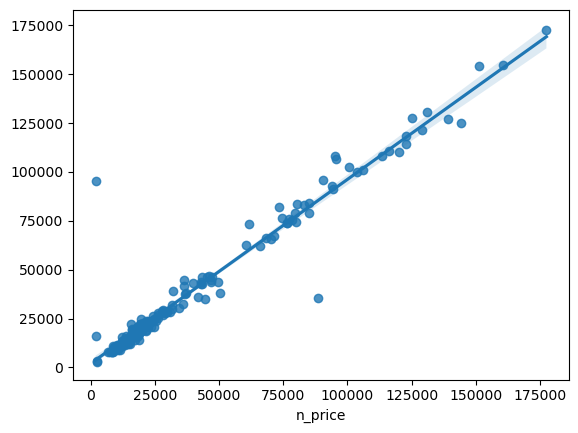

In [42]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import numpy as np
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2024,
             reg_alpha=0, reg_lambda=30).fit(train_x,train_y)
pred = xgb_model.predict(test_x)
print(xgb_model.score(train_x,train_y))
print(mean_absolute_error(test_y,pred))
print(np.sqrt(mean_squared_error(test_y,pred)))
print(r2_score(test_y,pred))
print(xgb_model.feature_importances_)
sns.regplot(x = test_y, y =pred)

In [ ]:
XGBRegressor(random_state = 2024 , n_estimators = 300 , learning_rate =.25 , reg_lambda = 30 ,   )

In [24]:
from sklearn.model_selection import GridSearchCV
n_xgb_model = XGBRegressor(random_state = 2024)
params = {'n_estimators':[100,200,300,500] , 'learning_rate':[.1 , .2 , .25 ,.3] , 'reg_lambda' : [10,20,30,40]}
xgb_grid = GridSearchCV(n_xgb_model,params ,n_jobs=-1 , scoring='r2').fit(train_x,train_y)
print(xgb_grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2024,
             reg_alpha=0, reg_lambda=30, ...)


In [37]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(random_state= 2024 , learning_rate= .01 , depth = 6 , l2_leaf_reg= 3).fit(train_x,train_y)
pred_cat = cat_model.predict(test_x)
print(cat_model.score(train_x,train_y))
print(mean_absolute_error(test_y,pred_cat))
print(r2_score(test_y,pred_cat))

0:	learn: 39311.4927883	total: 52.2ms	remaining: 52.2s
1:	learn: 39072.9907160	total: 54.6ms	remaining: 27.3s
2:	learn: 38836.9308229	total: 56.4ms	remaining: 18.7s
3:	learn: 38594.5919013	total: 57.5ms	remaining: 14.3s
4:	learn: 38349.2510631	total: 59.2ms	remaining: 11.8s
5:	learn: 38117.4679464	total: 61.1ms	remaining: 10.1s
6:	learn: 37892.0828873	total: 62.5ms	remaining: 8.87s
7:	learn: 37644.8714798	total: 64.1ms	remaining: 7.95s
8:	learn: 37414.0781329	total: 65ms	remaining: 7.15s
9:	learn: 37187.6535784	total: 66.3ms	remaining: 6.56s
10:	learn: 36948.5150715	total: 67.8ms	remaining: 6.09s
11:	learn: 36716.0658303	total: 69.1ms	remaining: 5.69s
12:	learn: 36498.5411881	total: 70.4ms	remaining: 5.35s
13:	learn: 36284.2511866	total: 71.4ms	remaining: 5.03s
14:	learn: 36064.8922554	total: 72.4ms	remaining: 4.75s
15:	learn: 35854.0501094	total: 73.4ms	remaining: 4.51s
16:	learn: 35636.2041593	total: 74.5ms	remaining: 4.3s
17:	learn: 35425.5160501	total: 75.5ms	remaining: 4.12s
18:	l

289:	learn: 15486.9364322	total: 238ms	remaining: 582ms
290:	learn: 15476.5956168	total: 238ms	remaining: 580ms
291:	learn: 15454.7450009	total: 239ms	remaining: 579ms
292:	learn: 15422.2553577	total: 240ms	remaining: 578ms
293:	learn: 15402.4519348	total: 240ms	remaining: 577ms
294:	learn: 15381.3754698	total: 241ms	remaining: 575ms
295:	learn: 15356.9359411	total: 241ms	remaining: 574ms
296:	learn: 15336.1346596	total: 242ms	remaining: 573ms
297:	learn: 15317.4622481	total: 243ms	remaining: 571ms
298:	learn: 15294.9515147	total: 243ms	remaining: 570ms
299:	learn: 15272.3132980	total: 244ms	remaining: 569ms
300:	learn: 15257.3113804	total: 244ms	remaining: 567ms
301:	learn: 15229.0436336	total: 245ms	remaining: 566ms
302:	learn: 15198.7565725	total: 245ms	remaining: 565ms
303:	learn: 15175.1761766	total: 246ms	remaining: 563ms
304:	learn: 15163.7759451	total: 247ms	remaining: 562ms
305:	learn: 15149.6131783	total: 247ms	remaining: 561ms
306:	learn: 15129.9197236	total: 248ms	remaining

632:	learn: 11135.0116879	total: 437ms	remaining: 253ms
633:	learn: 11122.6504645	total: 438ms	remaining: 253ms
634:	learn: 11111.4852322	total: 438ms	remaining: 252ms
635:	learn: 11103.5782874	total: 439ms	remaining: 251ms
636:	learn: 11101.0534742	total: 439ms	remaining: 250ms
637:	learn: 11087.3518706	total: 440ms	remaining: 250ms
638:	learn: 11086.1147709	total: 440ms	remaining: 249ms
639:	learn: 11080.8138609	total: 441ms	remaining: 248ms
640:	learn: 11077.6126576	total: 442ms	remaining: 247ms
641:	learn: 11065.7357658	total: 442ms	remaining: 247ms
642:	learn: 11052.7775280	total: 443ms	remaining: 246ms
643:	learn: 11047.1932624	total: 443ms	remaining: 245ms
644:	learn: 11038.0961920	total: 444ms	remaining: 244ms
645:	learn: 11030.2536212	total: 444ms	remaining: 244ms
646:	learn: 11020.7016142	total: 445ms	remaining: 243ms
647:	learn: 11007.2479886	total: 446ms	remaining: 242ms
648:	learn: 10999.9294547	total: 446ms	remaining: 241ms
649:	learn: 10992.0803961	total: 447ms	remaining

951:	learn: 9169.8703419	total: 621ms	remaining: 31.3ms
952:	learn: 9163.7194939	total: 622ms	remaining: 30.7ms
953:	learn: 9159.6251344	total: 622ms	remaining: 30ms
954:	learn: 9157.0048905	total: 623ms	remaining: 29.3ms
955:	learn: 9152.8501007	total: 623ms	remaining: 28.7ms
956:	learn: 9149.2098933	total: 624ms	remaining: 28ms
957:	learn: 9146.5542232	total: 625ms	remaining: 27.4ms
958:	learn: 9143.9150081	total: 625ms	remaining: 26.7ms
959:	learn: 9139.8049005	total: 626ms	remaining: 26.1ms
960:	learn: 9135.1432423	total: 626ms	remaining: 25.4ms
961:	learn: 9129.4534606	total: 627ms	remaining: 24.8ms
962:	learn: 9125.2447514	total: 627ms	remaining: 24.1ms
963:	learn: 9119.2894217	total: 628ms	remaining: 23.5ms
964:	learn: 9115.5637788	total: 629ms	remaining: 22.8ms
965:	learn: 9112.9728823	total: 629ms	remaining: 22.1ms
966:	learn: 9108.0754387	total: 630ms	remaining: 21.5ms
967:	learn: 9103.9890459	total: 630ms	remaining: 20.8ms
968:	learn: 9099.5871997	total: 631ms	remaining: 20.

In [39]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import GridSearchCV
rf_model = rfr(random_state=2024)
est_ls = [50 , 100 , 150] ; leaf_ls = [20,30,40] ; split_ls = [20,40,60]
params = {'n_estimators':est_ls , 'min_samples_leaf' : leaf_ls , 'min_samples_split': split_ls }
grid_rf = GridSearchCV(rf_model,params,n_jobs=-1 ,scoring='r2').fit(train_x,train_y)
print(grid_rf.best_estimator_)

RandomForestRegressor(min_samples_leaf=20, min_samples_split=20,
                      random_state=2024)


In [40]:
rfr_model = rfr(random_state= 2024 , min_samples_leaf= 20 , min_samples_split = 20).fit(train_x,train_y)
pred_rfr = rfr_model.predict(test_x)
tr_rfr_pred = rfr_model.predict(train_x)
print(r2_score(train_y,tr_rfr_pred))
print(mean_absolute_error(test_y,pred_rfr))
print(r2_score(test_y,pred_rfr))

0.7375996567079316
7993.004370357049
0.742061692374016


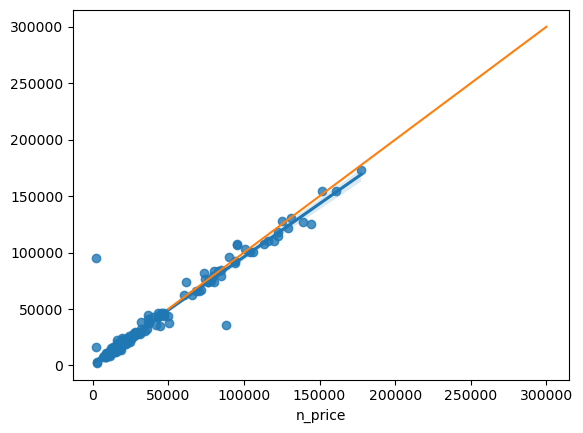

In [43]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.regplot(x = test_y , y = pred)
plt.plot([50000,100000,200000,300000],[50000,100000,200000,300000])

In [18]:
f_df = pd.read_csv('power_cars.csv')

In [19]:
f_df

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh
3,3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,7.06 Lakh
6196,7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,8.79 Lakh
6197,7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16 Lakh
6198,7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.57 Lakh


In [20]:
final_df = f_df.copy()

In [21]:
# def change_m(x):
#     y = float(x.split('k')[0])
#     return y

# final_df = final_df.iloc[:,1:]
# final_df['Mileage'] = final_df['Mileage'].apply(change_m)
# final_df['Engine'] = final_df['Engine'].apply(change) 

final_df['Year'] = final_df['Year'].astype('object')
final_df['Seats'] = final_df['Seats'].astype('object')


In [22]:
a = final_df.select_dtypes(exclude='object').columns.to_list()
final_df.loc[:,a] = scaler.fit_transform(final_df.loc[:,a])

In [23]:
final_df

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,-1.712355,Maruti Wagon R LXI CNG,Mumbai,-0.692011,2010,0.153638,CNG,Manual,First,1.863704,-1.032601,-1.009776,5.0,NaN
1,-1.711805,Hyundai Creta 1.6 CRDi SX Option,Pune,0.240452,2015,-0.190428,Diesel,Manual,First,0.322242,-0.062374,0.245732,5.0,NaN
2,-1.711256,Honda Jazz V,Chennai,-0.453474,2011,-0.134934,Petrol,Manual,First,-0.004735,-0.698670,-0.446237,5.0,8.61 Lakh
3,-1.710706,Maruti Ertiga VDI,Chennai,-0.323363,2012,0.320121,Diesel,Manual,First,0.566918,-0.617264,-0.445130,7.0,NaN
4,-1.710156,Audi A4 New 2.0 TDI Multitronic,Coimbatore,0.694974,2013,-0.194091,Diesel,Automatic,Second,-0.672035,0.578906,0.515138,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,2.260681,Tata Tiago 1.05 Revotorq XT Option,Pune,-0.231417,2016,-0.185844,Diesel,Manual,First,2.014959,-0.951195,-0.809751,5.0,7.06 Lakh
6196,2.262330,Ford EcoSport 1.5 Petrol Ambiente,Kochi,-0.081356,2017,-0.212459,Petrol,Manual,First,-0.271655,-0.203589,0.156422,5.0,8.79 Lakh
6197,2.262879,Jeep Compass 1.4 Sport,Mumbai,0.731405,2018,-0.578890,Petrol,Manual,First,-0.494088,-0.417902,0.869426,5.0,18.16 Lakh
6198,2.264528,Maruti Vitara Brezza ZDi,Kochi,0.073043,2017,-0.408189,Diesel,Manual,First,1.352107,-0.617264,-0.449927,5.0,10.57 Lakh


In [24]:
b = final_df.select_dtypes(include='object').columns.to_list()
final_df.loc[:,b] = final_df.loc[:,b].apply(encoder.fit_transform)

/tmp/ipykernel_19357/3994436906.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.loc[:,b] = final_df.loc[:,b].apply(encoder.fit_transform)


In [27]:
final_df.drop(columns=['Unnamed: 0','Price','Kilometers_Driven' , 'Owner_Type','Name', 'Location','New_Price'],axis=1,inplace=True)

In [28]:
final_df

,Year,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,12,0,1,1.863704,-1.032601,-1.009776,3
1,17,1,1,0.322242,-0.062374,0.245732,3
2,13,4,1,-0.004735,-0.698670,-0.446237,3
3,14,1,1,0.566918,-0.617264,-0.445130,5
4,15,1,0,-0.672035,0.578906,0.515138,3
...,...,...,...,...,...,...,...
6195,18,1,1,2.014959,-0.951195,-0.809751,3
6196,19,4,1,-0.271655,-0.203589,0.156422,3
6197,20,4,1,-0.494088,-0.417902,0.869426,3
6198,19,1,1,1.352107,-0.617264,-0.449927,3


In [29]:
pred = xgb_model.predict(final_df)
pred_ind = pred.astype(int)



In [30]:
f_df['n_price'] = pred_ind

In [32]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6200 non-null   int64  
 1   Name               6200 non-null   object 
 2   Location           6200 non-null   object 
 3   Price              6200 non-null   float64
 4   Year               6200 non-null   int64  
 5   Kilometers_Driven  6200 non-null   int64  
 6   Fuel_Type          6200 non-null   object 
 7   Transmission       6200 non-null   object 
 8   Owner_Type         6200 non-null   object 
 9   Mileage            6200 non-null   float64
 10  Engine             6200 non-null   float64
 11  Power              6200 non-null   float64
 12  Seats              6200 non-null   float64
 13  New_Price          1005 non-null   object 
 14  n_price            6200 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 726.7+ KB


In [33]:
f_df = f_df.drop(columns=['Unnamed: 0','New_Price'],axis=1)

In [35]:
f_df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,n_price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,10938
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,41748
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,14976
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19929
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,54093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,12043
6196,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,22168
6197,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,30616
6198,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,21888


In [36]:
f_df.to_csv('nnewcar.csv')

In [45]:
dfdf = pd.read_csv('ffinalcar.csv')

In [46]:
dfdf

,Unnamed: 0,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
0,0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,5.0,10033
1,1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,33018
2,2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,15472
3,3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,20042
4,4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,80092
...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6195,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,5.0,14963
6196,6196,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,5.0,25862
6197,6197,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,5.0,38939
6198,6198,Maruti Vitara Brezza ZDi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,5.0,22982
